# Desafios da Aula 5

Testar algoritimos de auto ML. 

## Inicialização aula 4 import de dados do enem

In [1]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Apresenta caracteristicas dos dados numericos para cada coluna

In [2]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [3]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna() # remove alunos com células vazias
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Mostrar a correlação entre as notas

In [4]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


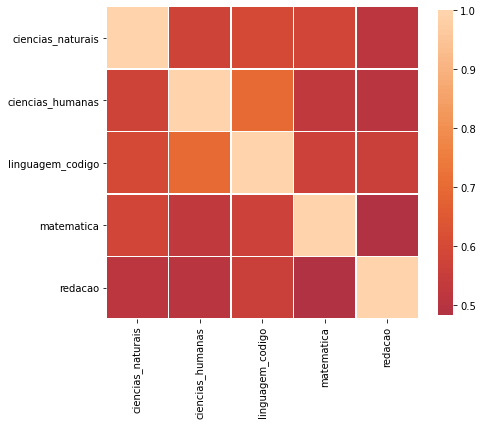

In [5]:
# paradas para plotar os dados
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8})

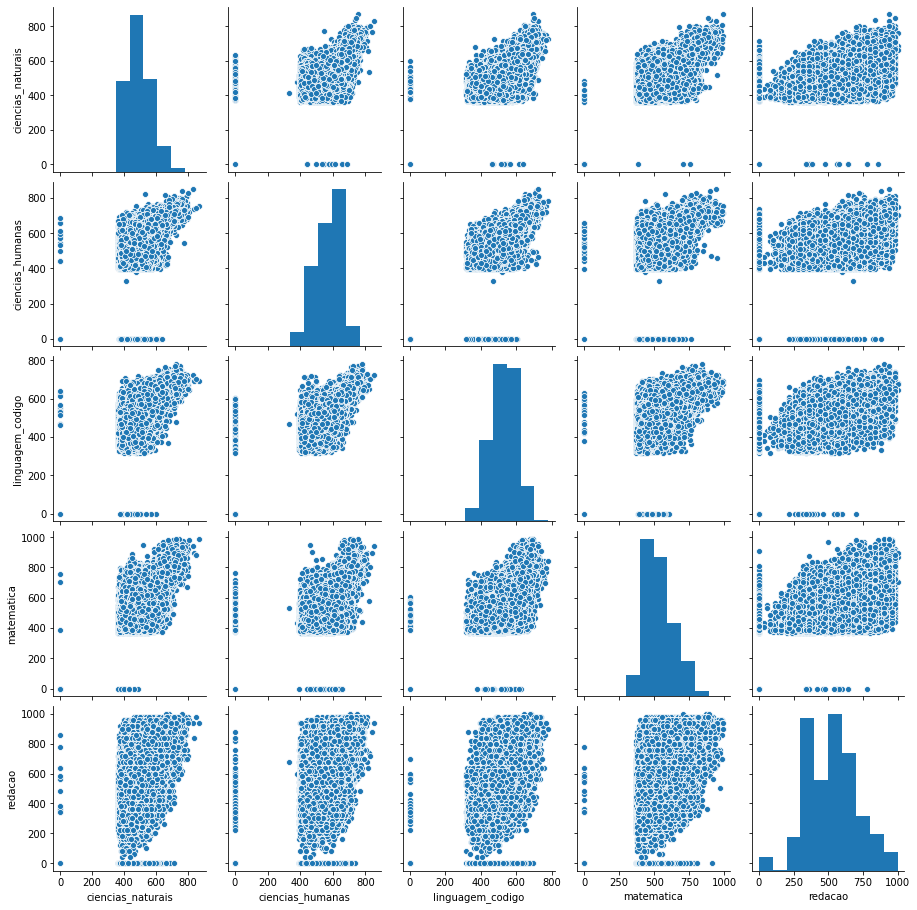

In [6]:
# Mesmo esquema usando pairplot

sns.pairplot(dados_notas)

## Inicialização da aula 5

Primeiro vamos usar algumas matérias **ciencias naturais**, **ciencias humanas**, **matematica** e **redacao** para prever as notas de **linguagens código**.

In [7]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head() # mostra as notas de entrada

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [8]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Vou usar alguns modelos prontos da biblioteca scikit-learn para resolver os problemas. [Link para documentação da biblioteca](https://scikit-learn.org/stable/)

Primeiro é necessário separar os dados em treino e teste. Cuidar para que não aconteça *overfiting*. Assim, o modelo não ficará viciado nas entradas do treino. 

A biblioteca scikit já possui uma função que separa aleatóriamente os dados **train_test_split**.

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267) # semente para que o numero aleatório seja sempre o mesmo

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar, random_state=326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [10]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


In [11]:
# Importa função para verificar o erro quadratico médio
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR

modelo = LinearSVR(C=0.001,max_iter=10000) # Definições do modelo.
modelo.fit(x_treino, y_treino)

predicoes_notas_linguagem = modelo.predict(x_teste)

print('\n-----------------\n Notas previstas:') # Apenas um separador
print(predicoes_notas_linguagem[:5])
print('-----------------\n Notas reais')
print(y_teste[:5])
print('-----------------\n \n Verifica Erro')
print('Erro quadratico médio:', 
      mean_squared_error(y_teste, predicoes_notas_linguagem))


-----------------
 Notas previstas:
[594.54918382 615.41438391 648.19302024 542.83101858 451.01837724]
-----------------
 Notas reais
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64
-----------------
 
 Verifica Erro
Erro quadratico médio: 2425.070683474945


Vou criar um **modelo dummy** para comparar com os demais



In [12]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor('mean')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48

# Solução dos desafios da aula 5



## Desafio 1

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

Informações sobre a função linearSVR [no link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR)

Para verificar a influencia de **C** e **max_iter**, utilizei dois laços **for** variando os parametros. Por padrão a o modelo LinearSVR(C=1, max_iter=1000). 

In [13]:
import warnings 
warnings.filterwarnings("ignore")

C_list = [1, 0.5, 0.1, 0.01, 0.001]
max_iter_list = [10, 100, 500, 1000, 10000]
ms_error = [[] for _ in range(len(max_iter_list))]
for j in range (len(max_iter_list)):
  for i in range(len(C_list)):
    print('Valores de max_iter=%.2f e C=%.3f.' %(max_iter_list[j], C_list[i]))
    # Variando A com max_iter padrão 
    modeloA = LinearSVR(C=C_list[i], max_iter=max_iter_list[j]) 
    modeloA.fit(x_treino, y_treino)
    ms_error[j].append(mean_squared_error(y_teste, modeloA.predict(x_teste)))
    # print('MS Error', ms_error[j])
print('Done')

Valores de max_iter=10.00 e C=1.000.
Valores de max_iter=10.00 e C=0.500.
Valores de max_iter=10.00 e C=0.100.
Valores de max_iter=10.00 e C=0.010.
Valores de max_iter=10.00 e C=0.001.
Valores de max_iter=100.00 e C=1.000.
Valores de max_iter=100.00 e C=0.500.
Valores de max_iter=100.00 e C=0.100.
Valores de max_iter=100.00 e C=0.010.
Valores de max_iter=100.00 e C=0.001.
Valores de max_iter=500.00 e C=1.000.
Valores de max_iter=500.00 e C=0.500.
Valores de max_iter=500.00 e C=0.100.
Valores de max_iter=500.00 e C=0.010.
Valores de max_iter=500.00 e C=0.001.
Valores de max_iter=1000.00 e C=1.000.
Valores de max_iter=1000.00 e C=0.500.
Valores de max_iter=1000.00 e C=0.100.
Valores de max_iter=1000.00 e C=0.010.
Valores de max_iter=1000.00 e C=0.001.
Valores de max_iter=10000.00 e C=1.000.
Valores de max_iter=10000.00 e C=0.500.
Valores de max_iter=10000.00 e C=0.100.
Valores de max_iter=10000.00 e C=0.010.
Valores de max_iter=10000.00 e C=0.001.
Done


Converti minha lista em um dataframe para visualização. As linhas representam as o número de iterações (max_iter) e as colunas o valor de C. 


In [14]:
%precision %.3f
pd.options.display.float_format = '{:,.3f}'.format
model_ms_error = pd.DataFrame(ms_error, columns = C_list, index=max_iter_list) 
model_ms_error

,1.000,0.500,0.100,0.010,0.001
10,"6,814.232","3,604.060","13,325.449","6,208.719","3,652.520"
100,"2,609.356","2,462.103","4,830.468","7,129.632","2,453.583"
500,"6,102.124","4,547.791","4,550.961","2,392.233","2,425.650"
1000,"7,353.367","2,233.926","3,920.500","2,461.914","2,425.397"
10000,"3,164.080","8,445.989","2,188.000","2,357.460","2,425.563"


Nesse dataframe a medida que aumentamos o número de iterações o erro médio quadrático converge para valores próximos. O mesmo padão não é observado se aumentarmos apenas C.

## Desafio 2

Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

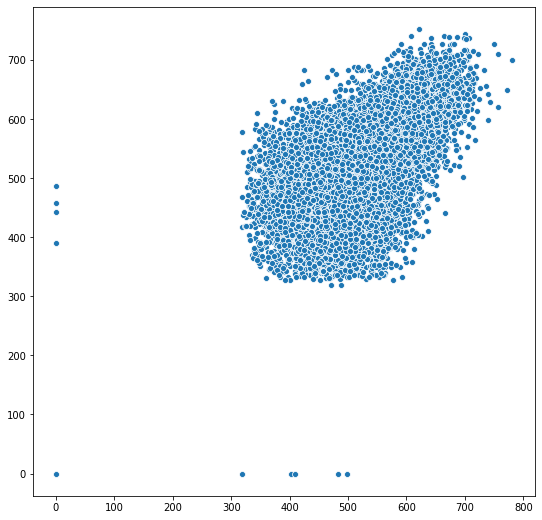

In [15]:
from sklearn.tree import DecisionTreeRegressor

# vou treinar o algoritimo usando a média das outrass nota para prever a nota 
# de liguagens e códigos.

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

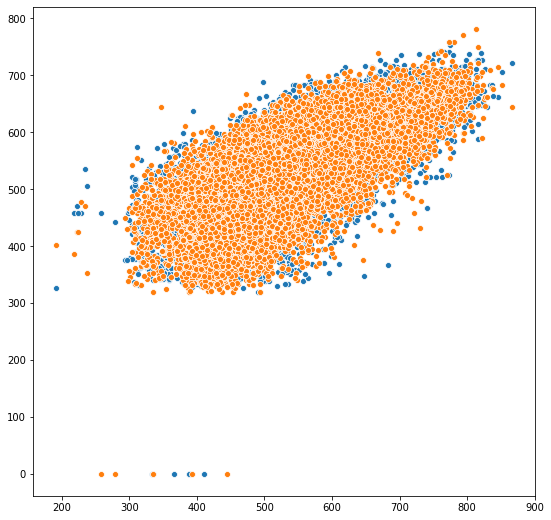

In [16]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)

Se plotarmos o gráfico usando as médias como eixo_x, não teremos aquela apaarencia de sapo. Agora parece que a pessoa que tirou uma média mais alta nas outras provas, tem a chanve de tirar uma nota mais alta em liguagens e códigos. 

Podemos verificar isso, observando se a correlação da média das 4 notas com a nota de linguagens é maior que das 4 notas individualmente. 

In [17]:
# Primeiro monto um dataframe com a média e a nota de linguagens
media_4_notas_notas_linguas = pd.concat([x_4_notas.mean(axis=1), y_adivinhar], axis=1, keys=['media_notas','y_teste'])
media_4_notas_notas_linguas.head()

,media_notas,y_teste
1,653.100,661.600
2,494.750,389.000
3,475.675,448.500
6,482.625,521.000
8,553.775,524.400


In [18]:
# Calculo a correlação
corr = media_4_notas_notas_linguas.corr()
corr

,media_notas,y_teste
media_notas,1.000,0.733
y_teste,0.733,1.000


In [19]:
# Comparo com as 4 notas individuais.
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.000,0.572,0.600,0.579,0.513
ciencias_humanas,0.572,1.000,0.698,0.529,0.503
linguagem_codigo,0.600,0.698,1.000,0.566,0.563
matematica,0.579,0.529,0.566,1.000,0.483
redacao,0.513,0.503,0.563,0.483,1.000


Se compararmos linguagens e códigos com as outras as outras notas, veremos que a correlação da média das 4 outras notas com as de linguages e códigos, a correlação da média é maior que qualquer uma das outras notas isoladamente isoladamente. 

Hipótese: como o enem é uma prova de interpretação, quem tem facilidade para intepretar texto, tem bom dominio de portugues e da lingua estrangeira escolhida, pode ir melhor nas demais provas, o que na média pode representar uma maior correlação com linguagens e códigos. 

## Desafio 3 

Remover as notas zero e testar os mesmos modelos, comparando o resultado

Comprimento original: 97270
Comprimento sem zeros: 95181


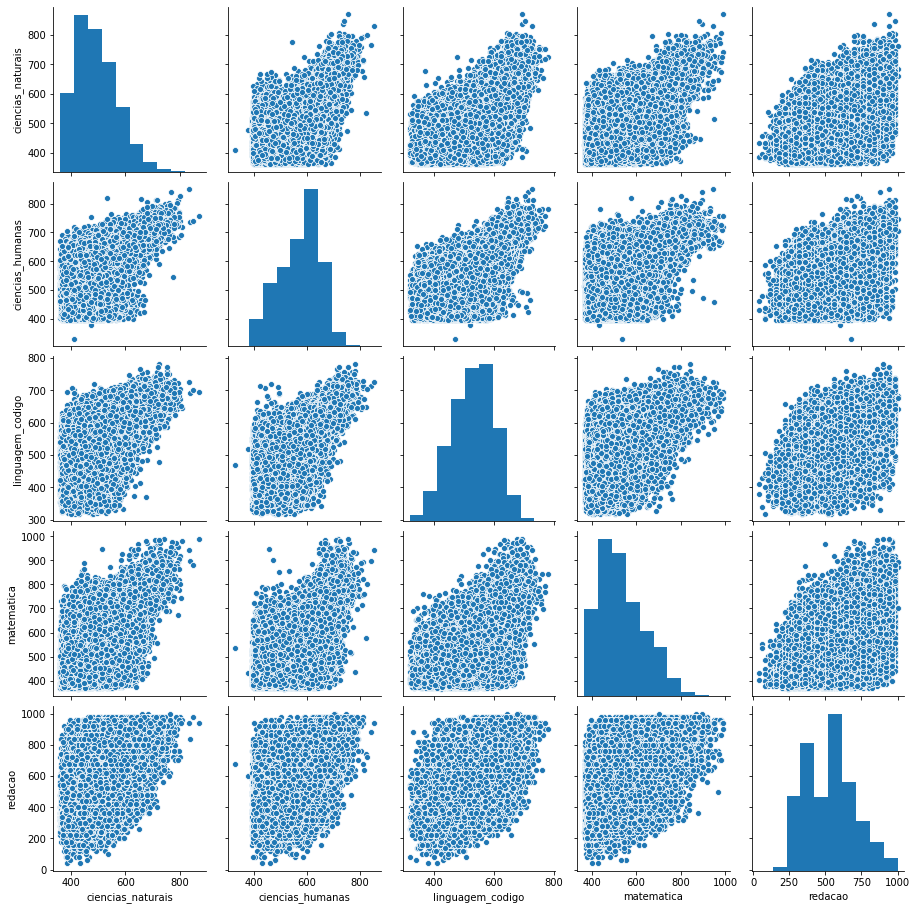

In [20]:
# remove linhas com zeros
dados_notas_nonzero = dados_notas[~(dados_notas == 0).any(axis=1)]
print('Comprimento original:', len(dados_notas))
print('Comprimento sem zeros:', len(dados_notas_nonzero))

# Acho que ser foram todos os zeros
sns.pairplot(dados_notas_nonzero)

In [21]:
dados_notas_nonzero.corr()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.000,0.583,0.604,0.578,0.531
ciencias_humanas,0.583,1.000,0.699,0.539,0.516
linguagem_codigo,0.604,0.699,1.000,0.568,0.573
matematica,0.578,0.539,0.568,1.000,0.498
redacao,0.531,0.516,0.573,0.498,1.000


Não parece ter mudado grande coisa na correlação das notas individuais. Vamos ver na média. Primeiro preciso separa as quatro outras notas de linguagens e códigos.

In [22]:
# separar as 4 notas e linguagens e códigops
x_4_notas_nz = dados_notas_nonzero[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas_nz.head() # mostra as notas de entrada

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.100,671.300,738.000,680.000
2,409.200,531.700,438.100,600.000
3,452.300,505.500,544.900,400.000
6,428.500,505.200,436.800,560.000
8,491.800,575.700,487.600,660.000


In [23]:
y_adivinhar_nz = dados_notas_nonzero['linguagem_codigo']
y_adivinhar_nz.head()

1   661.600
2   389.000
3   448.500
6   521.000
8   524.400
Name: linguagem_codigo, dtype: float64

In [24]:
media_4_notas_notas_linguas_nz = pd.concat([x_4_notas_nz.mean(axis=1), y_adivinhar_nz], axis=1, keys=['media_notas','y_teste'])
media_4_notas_notas_linguas_nz.corr()

,media_notas,y_teste
media_notas,1.000,0.737
y_teste,0.737,1.000


Remover os zeros também não aumentou muito a correlação da média com as notas de linguagens e códigos.


Se eu aplicar isso no primeiro modelo espero que o erro diminua. Primeiro vou serpara o dataset em teste e treino.

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267) # semente para que o numero aleatório seja sempre o mesmo

# f(x) = y
x_treino_nz, x_teste_nz, y_treino_nz, y_teste_nz = train_test_split(x_4_notas_nz, y_adivinhar_nz, random_state=326784)

print(x_treino_nz.shape)
print(x_teste_nz.shape)
print(y_treino_nz.shape)
print(y_teste_nz.shape)

(71385, 4)
(23796, 4)
(71385,)
(23796,)


Primeiro vou treinar um modelo dummy caso queira comaprar com os demais. 

5050.365606299117


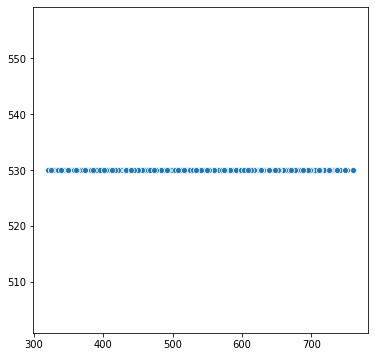

In [26]:
from sklearn.dummy import DummyRegressor

modelo_dummy_nz = DummyRegressor('mean')
modelo_dummy_nz.fit(x_treino_nz, y_treino_nz)
dummy_predicoes_nz = modelo_dummy_nz.predict(x_teste_nz)

dummy_error_nz = mean_squared_error(y_teste_nz, dummy_predicoes_nz)
print(dummy_error_nz)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_teste_nz.values, y=dummy_predicoes_nz)

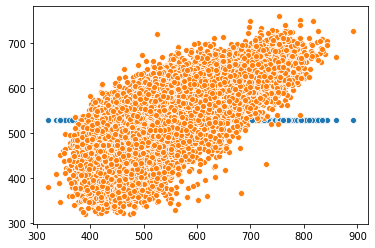

In [27]:
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=dummy_predicoes_nz)
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=y_teste_nz.values)

2318.539669950017


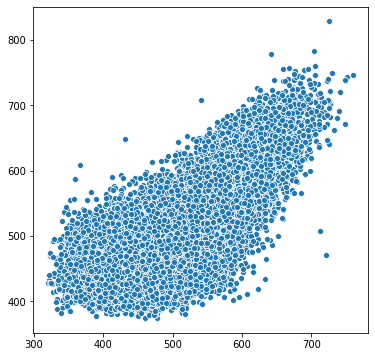

In [28]:
from sklearn.svm import LinearSVR

modelo_nz = LinearSVR(C=0.001,max_iter=10000)
modelo_nz.fit(x_treino_nz, y_treino_nz)
linear_predicoes_nz = modelo_nz.predict(x_teste_nz)

linear_error_nz = mean_squared_error(y_teste_nz, linear_predicoes_nz)
print(linear_error_nz )# se usar C e max_iter padrão varia muito

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_teste_nz.values, y=linear_predicoes_nz)

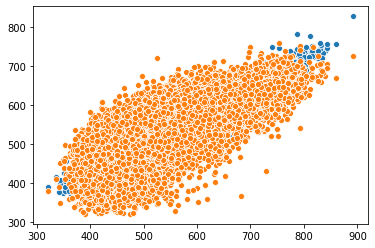

In [29]:
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=linear_predicoes_nz)
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=y_teste_nz.values)

4039.143152210456


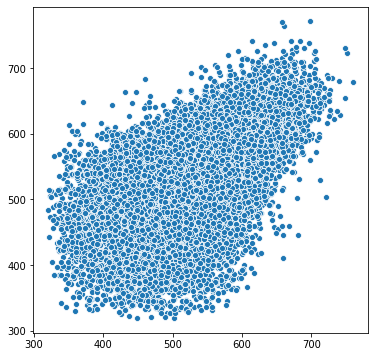

In [30]:
from sklearn.tree import DecisionTreeRegressor

modelo_nz = DecisionTreeRegressor()
modelo_nz.fit(x_treino_nz, y_treino_nz)
tree_predicoes_nz = modelo_nz.predict(x_teste_nz)

tree_error_nz = mean_squared_error(y_teste_nz, tree_predicoes_nz)
print(tree_error_nz)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_teste_nz.values, y=tree_predicoes_nz)

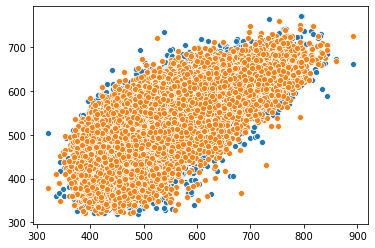

In [31]:
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=tree_predicoes_nz)
sns.scatterplot(x=x_teste_nz.mean(axis=1), y=y_teste_nz.values)

O erro médio quadratico dos modelos sem o zero é um pouco menor que o erro incluindo o zero.

## Desafio 4 

Os resultados são influenciados pelas decisões dos features e dos modelos escolhidos para prever os dados. 

A remoção de outliers (no caso os zeros) reduz o erro quadrático médio em  aproximadamente 3%, 4.5% e 2.5% nos modelos dummy, linear e decision tree, respectivamente. Essas reduções no erro podem parecer pequenas, mas em um N com 100000 alunos um erro quadratico de 2.5% pode representar um erro na predição de notatas de pelo menos 15000 alunos.  

Em resumo, achei muito valiosas essas aulas, pois aprendi maneiras de analisar os dados e chegar rapidamente em um modelo de predição.

Além disso fica facil de mostrar para alguem o que foi feito nesses cadernos do jupyter.

## Desafio 5

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

Eu vou treinar novamente os modelos para fazer as predições utilizando o dataset de treino.

5002.692504417293


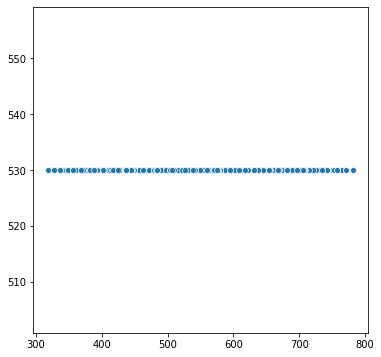

In [45]:
from sklearn.dummy import DummyRegressor

modelo_dummy_nz = DummyRegressor('mean')
modelo_dummy_nz.fit(x_treino_nz, y_treino_nz)
dummy_predicoes_nz_t = modelo_dummy_nz.predict(x_treino_nz)

dummy_error_nz_t = mean_squared_error(y_treino_nz, dummy_predicoes_nz_t)
print(dummy_error_nz_t)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_treino_nz.values, y=dummy_predicoes_nz_t)

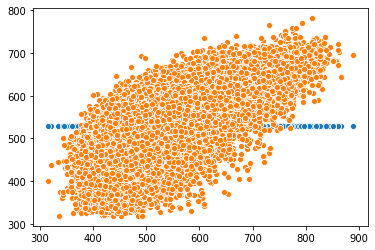

In [46]:
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=dummy_predicoes_nz_t)
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=y_treino_nz.values)

Fazendo um regressão linear.


2297.5997021084827


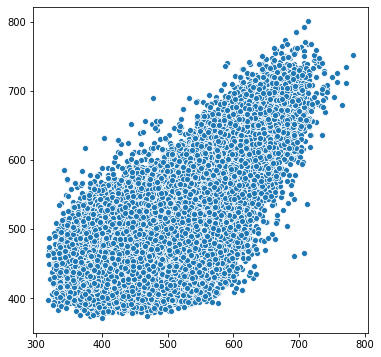

In [64]:
from sklearn.svm import LinearSVR

modelo_nz = LinearSVR(C=0.001,max_iter=10000)
modelo_nz.fit(x_treino_nz, y_treino_nz)
linear_predicoes_nz_t = modelo_nz.predict(x_treino_nz)

linear_error_nz_t = mean_squared_error(y_treino_nz, linear_predicoes_nz_t)
print(linear_error_nz_t )# se usar C e max_iter padrão varia muito

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_treino_nz.values, y=linear_predicoes_nz_t)

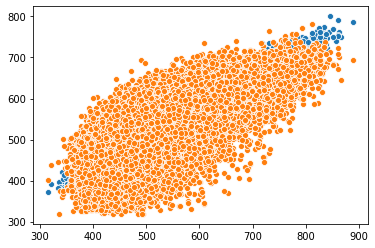

In [65]:
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=linear_predicoes_nz_t)
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=y_treino_nz.values)

Modelo com decision tree

0.0


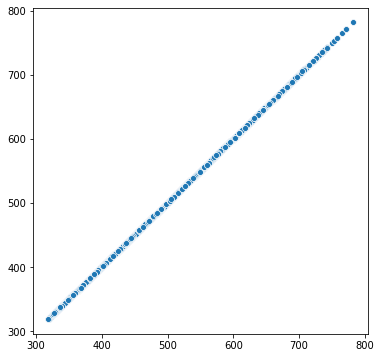

In [66]:
from sklearn.tree import DecisionTreeRegressor

modelo_nz = DecisionTreeRegressor()
modelo_nz.fit(x_treino_nz, y_treino_nz)
tree_predicoes_nz_t = modelo_nz.predict(x_treino_nz)

tree_error_nz_t = mean_squared_error(y_treino_nz, tree_predicoes_nz_t)
print(tree_error_nz_t)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_treino_nz.values, y=tree_predicoes_nz_t)

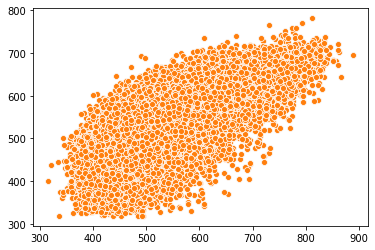

In [67]:
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=tree_predicoes_nz_t)
sns.scatterplot(x=x_treino_nz.mean(axis=1), y=y_treino_nz.values)

Os modelos de regressão linear e dummy não conseguiram gerar o mesmo valor para um valor de treino na entrada, já a arvore de decisão sim. 

Quando verificamos o erro quadrático médio, no demais não teve muita diferença o erro utilizando os dados de teste ou de treino. Mas na arvore de decisão o erro é zero, pois ela consegue reproduzir exatamente na saida da função os mesmo valores que foram usados durante o treino. 